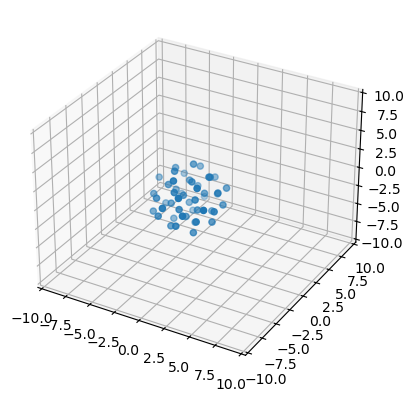

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter

class Boid:
    def __init__(self, position, velocity):
        self.position = np.array(position)
        self.velocity = np.array(velocity)

def update_boids(boids, separation_factor=0.05, alignment_factor=0.1, cohesion_factor=0.01, boundary_factor=0.1, max_speed=5.0, boundary=10):
    positions = np.array([boid.position for boid in boids])
    velocities = np.array([boid.velocity for boid in boids])
    N = len(boids)

    # Calculate separation
    separation = np.zeros_like(positions)
    for i in range(N):
        for j in range(N):
            if i != j:
                distance = np.linalg.norm(positions[i] - positions[j])
                if distance < 2:
                    separation[i] -= (positions[j] - positions[i]) / distance
    
    # Calculate alignment
    average_velocity = np.mean(velocities, axis=0)
    alignment = (average_velocity - velocities) * alignment_factor

    # Calculate cohesion
    center_of_mass = np.mean(positions, axis=0)
    cohesion = (center_of_mass - positions) * cohesion_factor

    # Update velocities and positions
    for i, boid in enumerate(boids):
        boid.velocity += separation[i] * separation_factor + alignment[i] + cohesion[i]

        # Boundary avoidance
        for dim in range(3):
            if boid.position[dim] < -boundary:
                boid.velocity[dim] += boundary_factor
            elif boid.position[dim] > boundary:
                boid.velocity[dim] -= boundary_factor

        speed = np.linalg.norm(boid.velocity)
        if speed > max_speed:
            boid.velocity = boid.velocity / speed * max_speed
        boid.position += boid.velocity

def init():
    scatter._offsets3d = ([], [], [])
    return scatter,

def animate(i):
    update_boids(boids)
    positions = np.array([boid.position for boid in boids])
    scatter._offsets3d = (positions[:,0], positions[:,1], positions[:,2])
    return scatter,

# Initialize boids
boids = [Boid(np.random.rand(3) * 20 - 10, np.random.rand(3) * 2 - 1) for _ in range(50)]

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
positions = np.array([boid.position for boid in boids])
scatter = ax.scatter(positions[:,0], positions[:,1], positions[:,2])

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# Create animation
ani = FuncAnimation(fig, animate, init_func=init, frames=100, interval=50, blit=True)

# Save animation as MP4
writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save('boid_simulation.mp4', writer=writer)

# Display the video in Jupyter Notebook
from IPython.display import Video
Video("boid_simulation.mp4")
